## Pyhton Code Boook
##### Programming for Business Report
##### Submitted by Kopty, Lanzona, Luo and Tran
##### Submitted to Tristan Reed on May 28, 2024

Note: Before running, kindly make sure the file "allyearswithcoors.csv" is within the same folder of this python code. This is an alternative way of getting the coordinates as there is a risk of facing server issues from geolocator that is out of our control. We thank you for your understanding.

#### Importing Data and Packages

In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import scipy as spx 
import math
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import csv
import plotly.express as px


#Setting the packages
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')

#For geomapping and location
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Polygon

In [8]:
#Importing the excel file
xls = pd.ExcelFile("DataFile.xlsx")
sheets = xls.sheet_names

data_xls = pd.read_excel("DataFile.xlsx", sheet_name = sheets)

In [9]:
#Extracting Data from the data_xls, in which each year will have their own data frame
OTP2020_df = data_xls['2020-23 OTP'] 
Y2020_df = data_xls['2020']
Y2019_df = data_xls['2019']
Y2018_df = data_xls['2018']
Y2017_df = data_xls['2017']
Y2016_df = data_xls['2016']
Y2015_df = data_xls['2015']
Y2014_df = data_xls['2014']
Y2013_df = data_xls['2013']
Y2012_df = data_xls['2012']
Y2011_df = data_xls['2011']
Y2010_df = data_xls['2010']

#Creating a list bank of the dataframes to easily conduct data cleaning and transformation
list_allyears = [OTP2020_df,Y2020_df,Y2019_df,Y2018_df,Y2017_df,Y2016_df,Y2015_df,Y2014_df,Y2013_df,Y2012_df,Y2011_df,Y2010_df]

#### Data Cleaning

In [10]:
#Renaming the columns appropriately
#We identify that columns with percentages have bad naming format

for i in range(len(list_allyears)):
    for columns in list_allyears[i]:
        list_allyears[i] = list_allyears[i].rename(columns={"OnTime Departures \n(%)":"OnTime Departures %",
                                      "OnTime Arrivals \n(%)":"OnTime Arrivals %",
                                      "Cancellations \n\n(%)":"Cancellations %",
                                      "Month":"Date",         
                                     })

In [11]:
#Identifying how many null values are there

for i in range(len(list_allyears)):
    print(i)
    print(list_allyears[i].isna().sum())

#Looking at the results, we find that Y2018 has a null value column which was not intended, called ["Unnamed: 15"]
#This might possibly from importing

#Furthermore, we will also remove the total columns for all the dataframe called All Ports
#This is so these summations do not 

for i in range(len(list_allyears)):
    list_allyears[i] = list_allyears[i][list_allyears[i]["Route"].str.contains("All Ports-All Ports") == False]

#There were also unintended values that were converted with the dataframe in 2012, particularly the last five: index 5231 to 5235

list_allyears[9] = list_allyears[9].drop(index=[5233,5234,5235])

0
Route                  0
Departing Port         0
Arriving Port          0
Airline                0
Date                   0
Sectors Scheduled      0
Sectors Flown          0
Cancellations          0
Departures On Time     0
Arrivals On Time       0
Departures Delayed     0
Arrivals Delayed       0
OnTime Departures %    0
OnTime Arrivals %      0
Cancellations %        0
dtype: int64
1
Route                  0
Departing Port         0
Arriving Port          0
Airline                0
Date                   0
Sectors Scheduled      0
Sectors Flown          0
Cancellations          0
Departures On Time     0
Arrivals On Time       0
Departures Delayed     0
Arrivals Delayed       0
OnTime Departures %    0
OnTime Arrivals %      0
Cancellations %        0
dtype: int64
2
Route                  0
Departing Port         0
Arriving Port          0
Airline                0
Date                   0
Sectors Scheduled      0
Sectors Flown          0
Cancellations          0
Departures On Time

In [12]:
#Validating the removal of nulls

for i in range(len(list_allyears)):
    print(i)
    print(list_allyears[i].isna().sum())
    
#We also found out that there are "na" values wihtin the dataset (with 0 departures and arrivals)
#We assume that these cancellations are not indicative of performance related to arrival and departure

#We will be keeping these values as they contribute to the cancellation count. 
#Furthermore, there is a valid reason why they are NA. Nevertheless we will keep them in mind all throughout the code.

0
Route                  0
Departing Port         0
Arriving Port          0
Airline                0
Date                   0
Sectors Scheduled      0
Sectors Flown          0
Cancellations          0
Departures On Time     0
Arrivals On Time       0
Departures Delayed     0
Arrivals Delayed       0
OnTime Departures %    0
OnTime Arrivals %      0
Cancellations %        0
dtype: int64
1
Route                  0
Departing Port         0
Arriving Port          0
Airline                0
Date                   0
Sectors Scheduled      0
Sectors Flown          0
Cancellations          0
Departures On Time     0
Arrivals On Time       0
Departures Delayed     0
Arrivals Delayed       0
OnTime Departures %    0
OnTime Arrivals %      0
Cancellations %        0
dtype: int64
2
Route                  0
Departing Port         0
Arriving Port          0
Airline                0
Date                   0
Sectors Scheduled      0
Sectors Flown          0
Cancellations          0
Departures On Time

In [13]:
#Replacing na with blank

def remove_na(x):
    return(pd.to_numeric(str(x).replace("na",""), errors = 'coerce'))

for i in range(len(list_allyears)):
    for columns in list_allyears[i]:
        list_allyears[i][["OnTime Departures %","OnTime Arrivals %","Cancellations %"]] = list_allyears[i][["OnTime Departures %","OnTime Arrivals %","Cancellations %"]].applymap(remove_na)

In [14]:
#Revalidating the dataformats while considering the errors or nulls
#We will be ignoring them in the meantime as they

for i in range(len(list_allyears)):
    list_allyears[i]["Route"].astype(str, errors='ignore')
    list_allyears[i]["Departing Port"].astype(str,errors='ignore')
    list_allyears[i]["Arriving Port"].astype(str,errors='ignore')
    list_allyears[i]["Airline"].astype(str,errors='ignore')
    list_allyears[i]["Date"].astype('datetime64[ns]',errors='ignore')
    list_allyears[i]["Sectors Scheduled"].astype(int,errors='ignore')
    list_allyears[i]["Sectors Flown"].astype(int,errors='ignore')
    list_allyears[i]["Cancellations"].astype(int,errors='ignore')
    list_allyears[i]["Departures On Time"].astype(int,errors='ignore')
    list_allyears[i]["Arrivals On Time"].astype(int,errors='ignore')
    list_allyears[i]["Departures Delayed"].astype(int,errors='ignore')
    list_allyears[i]["Arrivals Delayed"].astype(int,errors='ignore')
    list_allyears[i]["OnTime Departures %"].astype(float,errors='ignore')
    list_allyears[i]["OnTime Arrivals %"].astype(float,errors='ignore')
    list_allyears[i]["Cancellations %"].astype(float,errors='ignore')
    
#Knowing if the data formats are properly validated

for i in range(len(list_allyears)):
    print(i)
    print(list_allyears[i].dtypes)

0
Route                          object
Departing Port                 object
Arriving Port                  object
Airline                        object
Date                   datetime64[ns]
Sectors Scheduled               int64
Sectors Flown                   int64
Cancellations                   int64
Departures On Time              int64
Arrivals On Time                int64
Departures Delayed              int64
Arrivals Delayed                int64
OnTime Departures %           float64
OnTime Arrivals %             float64
Cancellations %               float64
dtype: object
1
Route                          object
Departing Port                 object
Arriving Port                  object
Airline                        object
Date                   datetime64[ns]
Sectors Scheduled               int64
Sectors Flown                   int64
Cancellations                   int64
Departures On Time              int64
Arrivals On Time                int64
Departures Delayed              

#### Creating new variables

In [15]:
#Creating the function to be applied across the years, creating three columns derived from the date column

def year_var(sheet):
    """Extracting date details from the date column Date"""
    result_year = []
    result_month = []
    result_day = []
    for element in sheet['Date']:
        result_year.append(str(element.year))
        result_month.append(str(element.month))
        result_day.append(str(element.day))
    sheet['Year'] = result_year
    sheet['Month'] = result_month
    sheet['Day'] = result_day

In [16]:
#Applying the function to all the dataframes

for i in range(len(list_allyears)):
    year_var(list_allyears[i])

In [17]:
#To keep data stored well, we will extract the dataframe we need for the problem for each year
#Index were reset here since we removed some values and just to be sure, so that functions and element-wise functions can work

df2020 = list_allyears[0][list_allyears[0]["Year"] == "2020"].reset_index(drop=True)
df2021 = list_allyears[0][list_allyears[0]["Year"] == "2021"].reset_index(drop=True)
df2022 = list_allyears[0][list_allyears[0]["Year"] == "2022"].reset_index(drop=True)
df2023 = list_allyears[0][list_allyears[0]["Year"] == "2023"].reset_index(drop=True)

df2019 = list_allyears[2].reset_index(drop=True)
df2018 = list_allyears[3].reset_index(drop=True)
df2017 = list_allyears[4].reset_index(drop=True)
df2016 = list_allyears[5].reset_index(drop=True)
df2015 = list_allyears[6].reset_index(drop=True)
df2014 = list_allyears[7].reset_index(drop=True)
df2013 = list_allyears[8].reset_index(drop=True)
df2012 = list_allyears[9].reset_index(drop=True)
df2011 = list_allyears[10].reset_index(drop=True)
df2010 = list_allyears[11].reset_index(drop=True)

#There were also problems with the Airlines at year 2023, specifically on "virgin Airlines"

for i in range(len(df2023)):
    if df2023["Airline"][i] == "virgin Australia":
        df2023["Airline"][i] = "Virgin Australia"
    else:
        continue

In [21]:
#Creating all year dataframe

all_years = pd.DataFrame()

for dataframes in (df2020,df2021,df2022,df2023,df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011,df2010):
    all_years =  pd.concat([all_years, dataframes], ignore_index=True)

Route Departing Port Arriving Port       Airline  \
0        Adelaide-Brisbane       Adelaide      Brisbane       Jetstar   
1      Adelaide-Gold Coast       Adelaide    Gold Coast       Jetstar   
2       Adelaide-Melbourne       Adelaide     Melbourne       Jetstar   
3           Adelaide-Perth       Adelaide         Perth       Jetstar   
4          Adelaide-Sydney       Adelaide        Sydney       Jetstar   
...                    ...            ...           ...           ...   
78137   Sydney-Wagga Wagga         Sydney   Wagga Wagga  All Airlines   
78138  Townsville-Brisbane     Townsville      Brisbane  All Airlines   
78139    Townsville-Cairns     Townsville        Cairns  All Airlines   
78140    Townsville-Sydney     Townsville        Sydney  All Airlines   
78141   Wagga Wagga-Sydney    Wagga Wagga        Sydney  All Airlines   

            Date  Sectors Scheduled  Sectors Flown  Cancellations  \
0     2020-01-01               30.0           27.0            3.0   
1     2020-01-01               31.0           30.0            1.0   
2     2020-01-01              119.0          106.0           13.0   
3     2020-01-01               21.0           20.0            1.0   
4     2020-01-01               91.0           87.0            4.0   
...          ...                ...            ...            ...   
78137 2010-12-01              221.0          221.0            0.0   
78138 2010-12-01              339.0          336.0            3.0   
78139 2010-12-01              186.0          185.0            1.0   
78140 2010-12-01               59.0           59.0            0.0   
78141 2010-12-01              221.0          221.0            0.0   

       Departures On Time  Arrivals On Time  Departures Delayed  \
0                    18.0              19.0                 9.0   
1                    15.0              14.0                15.0   
2                    61.0              66.0                45.0   
3                    11.0              16.0                 9.0   
4                    69.0              69.0                18.0   
...                   ...               ...                 ...   
78137               174.0             149.0                47.0   
78138               267.0             241.0                69.0   
78139               121.0             111.0                64.0   
78140                34.0              39.0                25.0   
78141               184.0             165.0                37.0   

       Arrivals Delayed  OnTime Departures %  OnTime Arrivals %  \
0                   8.0            66.666667          70.370370   
1                  16.0            50.000000          46.666667   
2                  40.0            57.547170          62.264151   
3                   4.0            55.000000          80.000000   
4                  18.0            79.310345          79.310345   
...                 ...                  ...                ...   
78137              72.0            78.733032          67.420814   
78138              95.0            79.464286          71.726190   
78139              74.0            65.405405          60.000000   
78140              20.0            57.627119          66.101695   
78141              56.0            83.257919          74.660633   

       Cancellations %  Year Month Day  
0            10.000000  2020     1   1  
1             3.225806  2020     1   1  
2            10.924370  2020     1   1  
3             4.761905  2020     1   1  
4             4.395604  2020     1   1  
...                ...   ...   ...  ..  
78137         0.000000  2010    12   1  
78138         0.884956  2010    12   1  
78139         0.537634  2010    12   1  
78140         0.000000  2010    12   1  
78141         0.000000  2010    12   1  

[78142 rows x 18 columns]

#### Extracting spatial data

In [15]:
#Extracting coordinates for geomaps, etc.
aggregate_list = {}

for column in list(all_years.columns):
    if is_numeric_dtype(all_years[column]):
        aggr_method = 'sum'
    else:
        aggr_method = 'first'
    aggregate_list.update({column:aggr_method})
    
port_locations = all_years.groupby('Departing Port').aggregate(aggregate_list).index.values.tolist()

geo_list = []

#We utilise the nominatim geolocator to retrieve the coordinates and polygons
for locate in port_locations:
    location = geolocator.geocode(locate + ", Australia", geometry='wkt')
    geo_list.append([locate,location.latitude,location.longitude,location.raw["geotext"]])

GeocoderTimedOut: Service timed out

In [15]:
#Creating a dataframe for geo data to match each route

#For departure
geo_df = pd.DataFrame(geo_list, columns=['Port_dep','latitude_dep','longitude_dep','Polygon'])
geo_df["Polygon"] = gpd.GeoSeries.from_wkt(geo_df["Polygon"])
geo_df = GeoDataFrame(geo_df, geometry=geo_df["Polygon"]) 

#For arrival
geo_df2 = pd.DataFrame(geo_list, columns=['Port_arr','latitude_arr','longitude_arr','Polygon'])
geo_df2["Polygon"] = gpd.GeoSeries.from_wkt(geo_df2["Polygon"])
geo_df2 = GeoDataFrame(geo_df2, geometry=geo_df2["Polygon"]) 

In [16]:
#Merging with the dataframe for all years
#These dataframes will be used in visualising map graphs

all_yearswithcoors = pd.merge(left=all_years,
    right=geo_df,
    left_on="Departing Port",
    right_on="Port_dep",
    how="left"
)

all_yearswithcoors_all = pd.merge(left=all_yearswithcoors,
    right=geo_df2,
    left_on="Arriving Port",
    right_on="Port_arr",
    how="left"
)

all_yearswithcoors_all = all_yearswithcoors_all.drop(columns=["Polygon_x","Polygon_y","Port_dep","Port_arr"])

##### If server timed out, kindly use the emergency file. Please disregard this if no timeout issues occur.

In [19]:
#There are times that a server time out will happen that is outside our scope
#Kindly utilise this code and the file containing the complete data

all_yearswithcoors_all = pd.read_csv("allyearswithcoors.csv")

### Questions

#### Question 1

For each year between 2020 and 2023 inclusive, which five routes have the best and worst on time
departures and on time arrivals? (for clarity, this is asking you to generate four separate lists of five
routes, however each route will appear for each of the four years).

In [22]:
#Creating a function to apply to easily apply to the years

def year_eval(year):
    """The function returns the dataframes that contain the best and worst routes. Kindly assign four values for this function to store best departure, worst departure, best arrival and worst arrival."""
    
    #We create an aggregation list to properly aggregate the columns of different types
    aggregate_list = {}

    for column in list(year.columns):
        if column in ["latitude_dep","longitude_dep","latitude_arr","longitude_arr"]:
            aggr_method = 'first'
        elif is_numeric_dtype(year[column]):
            aggr_method = 'sum'
        else:
            aggr_method = 'first'
        aggregate_list.update({column:aggr_method})
    
    #We calculate the main metric using the grouped by data frame
    base = year.groupby('Route').aggregate(aggregate_list)
    base['Aggregated Departures'] = base["Departures On Time"]/base["Sectors Flown"]
    base['Aggregated Arrivals'] = base["Arrivals On Time"]/base["Sectors Flown"]
    
    #We base the best and worst performance on aggregated arrivals and departures over their sectors flown.
    prelist_1 = base.sort_values(['Aggregated Departures','Sectors Flown'], ascending = False).head(5)[['Aggregated Departures']]
    prelist_2 = base.sort_values(['Aggregated Departures','Sectors Flown'], ascending = True).head(5)[['Aggregated Departures']]
    
    prelist_3 = base.sort_values(['Aggregated Arrivals','Sectors Flown'], ascending = False).head(5)[['Aggregated Arrivals']]
    prelist_4 = base.sort_values(['Aggregated Arrivals','Sectors Flown'], ascending = True).head(5)[['Aggregated Arrivals']]
    
    #the funciton returns the list and the 
    return prelist_1,prelist_2,prelist_3,prelist_4

#### Question 2

Consider the same Question 1 above, but aggregate both directions of a city pair to be a route.
Additionally, comment on what differences are there between the original four and new four lists? (that
is, Sydney – Melbourne and Melbourne – Sydney, for example, is now considered one route).

In [23]:
def route_aggr(year):
    """The function aggregates the similar routes into one. Kindly assign four values for this function to store best departure, worst departure, best arrival and worst arrival."""
    year['Route ID'] = 0
    count = 1
    
    #Initially, the function creates a new column and uses a loop to mark the routes that are similar to each other.
    for i in range(len(year)):
        if year["Route ID"][i] != 0:
            continue
        else:  
            year["Route ID"][i] = count
            for j in range(len(year)):
                if year["Departing Port"][i] == year["Arriving Port"][j] and year["Arriving Port"][i] == year["Departing Port"][j]:
                    year["Route ID"][j] = '%s' % (year["Route"][i])
                elif year["Departing Port"][i] == year["Departing Port"][j] and year["Arriving Port"][i] == year["Arriving Port"][j]:
                    year["Route ID"][j] = '%s' % (year["Route"][i])
                else:
                    continue
        count += 1

def year_eval_agg(year):
    """The function evaluates the dataset to determine the best and worst departure and arrival perfoamnce with aggregated routes."""
    
    #We apply the same process and methods from question 1, just with different metrics.
    aggregate_list = {}

    for column in list(year.columns):
        if column in ["latitude_dep","longitude_dep","latitude_arr","longitude_arr"]:
            aggr_method = 'first'
        elif is_numeric_dtype(year[column]):
            aggr_method = 'sum'
        else:
            aggr_method = 'first'
        aggregate_list.update({column:aggr_method})
        
    base = year.groupby('Route ID').aggregate(aggregate_list)
    base['Aggregated Departures'] = base["Departures On Time"]/base["Sectors Flown"]
    base['Aggregated Arrivals'] = base["Arrivals On Time"]/base["Sectors Flown"]
    
    prelist_1 = base.sort_values(['Aggregated Departures','Sectors Flown'], ascending = False).head(5)[['Aggregated Departures']]
    prelist_2 = base.sort_values(['Aggregated Departures','Sectors Flown'], ascending = True).head(5)[['Aggregated Departures']]
    
    prelist_3 = base.sort_values(['Aggregated Arrivals','Sectors Flown'], ascending = False).head(5)[['Aggregated Arrivals']]
    prelist_4 = base.sort_values(['Aggregated Arrivals','Sectors Flown'], ascending = True).head(5)[['Aggregated Arrivals']]
    
    #The function then returns the four list for 
    return prelist_1,prelist_2,prelist_3,prelist_4

#### Question 3

Utilise Python (3) to determine the first quartile number of sectors flown per route for all routes (per the
above) within the file – that is, how many sectors would be exceeded for the route to be within the first
quartile. Repeat Question 1 above again (do not aggregate the routes) to see how the statistics change.
Again, comment on the differences between this analysis and that of the original analysis.

In [24]:
def quantile_eval(year,quantile):
    """The function creates a column to know whether the sectors flown of a specific row is above or equal to the first quartile relative to its route."""
    
    aggregate_list = {}

    for column in list(year.columns):
        if column in ["latitude_dep","longitude_dep","latitude_arr","longitude_arr"]:
            aggr_method = 'first'
        elif is_numeric_dtype(year[column]):
            aggr_method = 'sum'
        else:
            aggr_method = 'first'
        aggregate_list.update({column:aggr_method})
        
    route_list = year.groupby('Route ID').aggregate(aggregate_list).index.values.tolist()
    quantile_dict = {}
    
    #The dictionary allows having a storage for the quantile based on the route (aggregated).
    for route in route_list:
        quantile_dict.update({ route: np.quantile(year[(year["Route ID"] == route)]['Sectors Flown'], quantile)})

    #The process is basically treating each as False initially but evaluating each element if they are above the quantile.
    year['Above Quantile'] = False
    
    #The code below turns the False into True if their sectors flown are above the quantile given.
    for routeID,quantile in quantile_dict.items():
        for i in range(len(year)):
            if year["Route ID"][i] == routeID:
                if int(year['Sectors Flown'][i]) >= float(quantile):
                    year['Above Quantile'][i] = True
                else:
                    continue
            else:
                continue

#### Question 4

Which five Arriving and Departing ports had the most cancellations – in terms of absolute numbers of
sectors scheduled and in terms of percentage thereof? Comment on which of the two metrics you think
is more appropriate to use to determine the effect of cancellations.

In [25]:
def cancellation_eval(year):
    """The function evaluates a dataframe to determine the cancecllation performance for arrival and departure ports. Kindly assign four values for this function to store highest cancellation rates in departing port, highest cancellation rates in arriving port, highest cancellation count in departing port, and highest cancellation count in arriving port."""
    
    #The initial step is calculating the aggregated cancellations based on ports.
    
    aggregate_list = {}

    for column in list(year.columns):
        if column in ["latitude_dep","longitude_dep","latitude_arr","longitude_arr"]:
            aggr_method = 'first'
        elif is_numeric_dtype(year[column]):
            aggr_method = 'sum'
        else:
            aggr_method = 'first'
        aggregate_list.update({column:aggr_method})
    
    #The difference in this code is that the metric is based on cancellations over sectors scheduled to fly
    base_depart = year.groupby('Departing Port').aggregate(aggregate_list)
    base_depart['Aggregated Cancellations Depart'] = base_depart["Cancellations"]/base_depart["Sectors Scheduled"]
    
    base_arrive = year.groupby('Arriving Port').aggregate(aggregate_list)
    base_arrive['Aggregated Cancellations Arrive'] = base_arrive["Cancellations"]/base_arrive["Sectors Scheduled"]
    
    prelist_1 = base_depart.sort_values(['Aggregated Cancellations Depart','Sectors Scheduled'], ascending = False).head(5)[['Aggregated Cancellations Depart','Sectors Scheduled']]
    prelist_2 = base_arrive.sort_values(['Aggregated Cancellations Arrive','Sectors Scheduled'], ascending = False).head(5)[['Aggregated Cancellations Arrive','Sectors Scheduled']]
    
    prelist_3 = base_depart.sort_values(['Cancellations','Sectors Scheduled'], ascending = False).head(5)[['Cancellations','Sectors Scheduled']]
    prelist_4 = base_arrive.sort_values(['Cancellations','Sectors Scheduled'], ascending = False).head(5)[['Cancellations','Sectors Scheduled']]
    
    return prelist_1,prelist_2,prelist_3,prelist_4

### Answers for 1 to 4
This section provides the code and applying the code to the years'dataset.

#### Question 1

In [26]:
#Legend: dep - departure, arr - arrival
#For year 2020
bestdep2020,wordep2020,bestarr2020,worarr2020 = year_eval(df2020)

#For year 2021
bestdep2021,wordep2021,bestarr2021,worarr2021 = year_eval(df2021)

#For year 2022
bestdep2022,wordep2022,bestarr2022,worarr2022 = year_eval(df2022)

#For year 2023
bestdep2023,wordep2023,bestarr2023,worarr2023 = year_eval(df2023)

In [27]:
#The code below outputs the dataframe containing the best (bes) departure (dep) routes in 2020
bestdep2020

Aggregated Departures
Route                                      
Alice Springs-Darwin               0.954545
Cairns-Townsville                  0.930931
Brisbane-Emerald                   0.923077
Perth-Darwin                       0.922807
Perth-Port Hedland                 0.920930

#### Question 2

In [28]:
#Prepairing aggregation for the years by utilising the function
#It creates a column inside the dataframe
route_aggr(df2020)
route_aggr(df2021)
route_aggr(df2022)
route_aggr(df2023)

In [30]:
#Legend: dep - departure, arr - arrival, agg - aggregated routes
#For year 2020
bestdep2020_agg,wordep2020_agg,bestarr2020_agg,worarr2020_agg = year_eval_agg(df2020)

#For year 2021
bestdep2021_agg,wordep2021_agg,bestarr2021_agg,worarr2021_agg = year_eval_agg(df2021)

#For year 2022
bestdep2022_agg,wordep2022_agg,bestarr2022_agg,worarr2022_agg = year_eval_agg(df2022)

#For year 2023
bestdep2023_agg,wordep2023_agg,bestarr2023_agg,worarr2023_agg = year_eval_agg(df2023)

In [31]:
#The code below outputs the dataframe containing the best (bes) departure (dep) aggregated (agg) routes in 2020
bestdep2020_agg

Aggregated Departures
Route ID                                   
Alice Springs-Darwin               0.931818
Brisbane-Emerald                   0.920967
Cairns-Townsville                  0.914157
Kalgoorlie-Perth                   0.894973
Adelaide-Canberra                  0.889053

#### Question 3

In [32]:
#Prepairing the filter for those above or equal to the 75th percentile per route
#The function below creates columns inside the dataframe
quantile_eval(df2020,.75)
quantile_eval(df2021,.75)
quantile_eval(df2022,.75)
quantile_eval(df2023,.75)

In [33]:
#Legend: dep - departure, arr - arrival, quan - quantile routes
#Through the above quantile column we can filter those that are below the 75th percentile

#For year 2020
bestdep2020_quan,wordep2020_quan,bestarr2020_quan,worarr2020_quan = year_eval(df2020[df2020['Above Quantile']==True])

#For year 2021
bestdep2021_quan,wordep2021_quan,bestarr2021_quan,worarr2021_quan = year_eval(df2021[df2021['Above Quantile']==True])

#For year 2022
bestdep2022_quan,wordep2022_quan,bestarr2022_quan,worarr2022_quan = year_eval(df2022[df2022['Above Quantile']==True])

#For year 2023
bestdep2023_quan,wordep2023_quan,bestarr2023_quan,worarr2023_quan = year_eval(df2023[df2023['Above Quantile']==True])

In [34]:
#The code below outputs the dataframe containing the best (bes) departure (dep) above the 75th percentile (quan) routes in 2020
bestdep2020_quan

Aggregated Departures
Route                                       
Alice Springs-Darwin                0.954545
Adelaide-Port Lincoln               0.927818
Brisbane-Emerald                    0.920455
Cairns-Townsville                   0.919260
Perth-Darwin                        0.916376

#### Question 4

In [35]:
#Legend: dep - departure, arr - arrival
#For here, 'raw' means the raw count of cancecllations while the 'per' is the percentage.

#For year 2020
candep2020per,canarr2020per,candep2020raw,canarr2020raw = cancellation_eval(df2020)

#For year 2021
candep2021per,canarr2021per,candep2021raw,canarr2021raw = cancellation_eval(df2021)

#For year 2022
candep2022per,canarr2022per,candep2022raw,canarr2022raw = cancellation_eval(df2022)

#For year 2023
candep2023per,canarr2023per,candep2023raw,canarr2023raw = cancellation_eval(df2023)

In [36]:
#The code below outputs the dataframe containing the five departuring ports (dep) with the highest cancellation (can) rates % (per) in 2020
candep2020per

Aggregated Cancellations Depart  Sectors Scheduled
Departing Port                                                    
Sydney                                 0.109318              70748
Melbourne                              0.108193              53238
Canberra                               0.093163              10970
Newcastle                              0.089806               3296
Ayers Rock                             0.088235                340

### Other Questions

#### Question 5

Once you have undertaken the above analysis, visualise the results in a manner that you deem
appropriate for the data. Briefly describe why you have chosen the particular form of visualisation (for
each visualisation) and ensure that each visualisation is appropriately labelled such that there is no
misunderstanding as to which analysis it corresponds to.

##### Routes using Bar Charts

In [37]:
#We create a function for the bargraph to be applied across the years

def bargraph(yeardata,x_axis,y_axis,barcolor,i,title):
    """Creates a bargraph for the best and worst for 2020 to 2023"""
    
    bar = sns.barplot(ax=axes[i], x=x_axis, y=y_axis, data=yeardata, color=barcolor, edgecolor=None)
    sns.despine(bottom = True, left = True)
    bar.set(xlabel = None,ylabel =None)
    bar.set_title(title, fontsize = 13,color = barcolor, weight='bold')
    bar.xaxis.label.set_color('black')
    bar.yaxis.label.set_color('black')
    bar.set_xticklabels(bar.get_xticklabels(), rotation=75)
    bar.set_yticks([])

    for i in bar.containers:
        bar.bar_label(i,fontsize=10,fmt=lambda x: f'{round(x*100,1)}%',color="black")

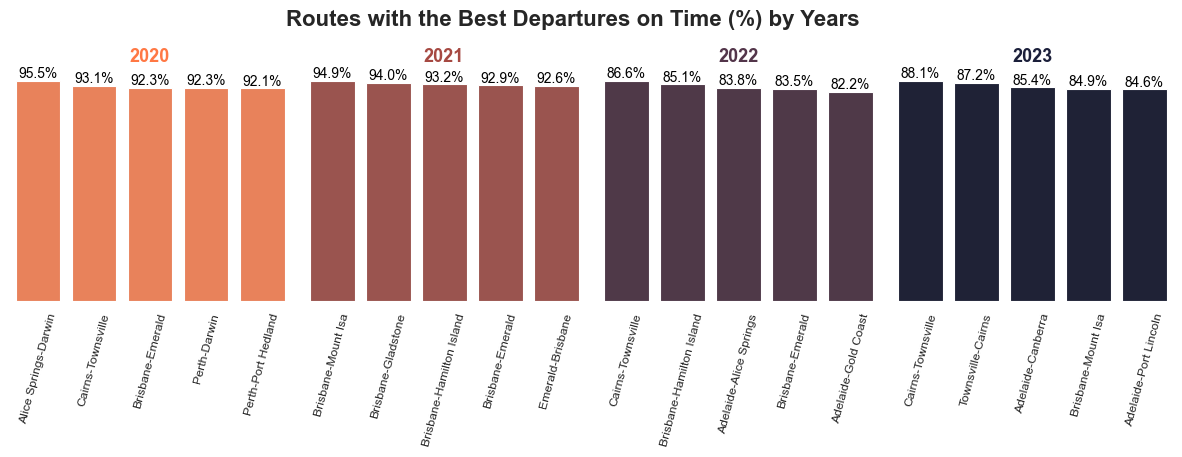

In [40]:
#Best Departure Route across the years

sns.set_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

#We utilise subplots to include all the years
fig, axes = plt.subplots(1, 4, figsize=(15, 3))
plt.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('Routes with the Best Departures on Time (%) by Years', fontsize=16, y=1.08,weight='bold')
        
#the function is applied here where we can also customise the color, title and what position in the subplot the plot is
bargraph(bestdep2020,"Route","Aggregated Departures","#FF7844",0,"2020")
bargraph(bestdep2021,"Route","Aggregated Departures","#A64942",1,"2021")
bargraph(bestdep2022,"Route","Aggregated Departures","#53354A",2,"2022")
bargraph(bestdep2023,"Route","Aggregated Departures","#1B1F3A",3,"2023")

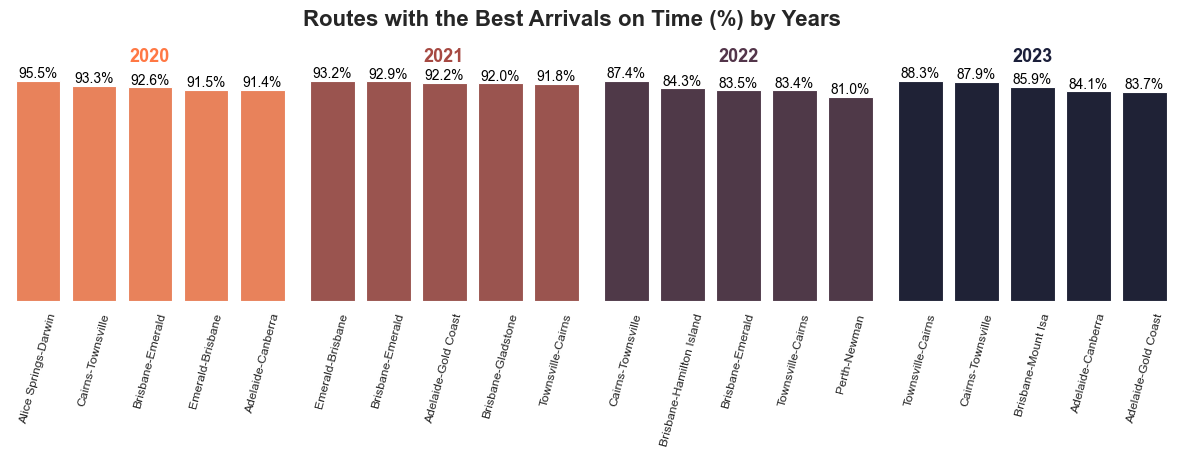

In [39]:
#Best Arrival Route

sns.set_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

fig, axes = plt.subplots(1, 4, figsize=(15, 3))
plt.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('Routes with the Best Arrivals on Time (%) by Years', fontsize=16, y=1.08,weight='bold')
        
bargraph(bestarr2020,"Route","Aggregated Arrivals","#FF7844",0,"2020")
bargraph(bestarr2021,"Route","Aggregated Arrivals","#A64942",1,"2021")
bargraph(bestarr2022,"Route","Aggregated Arrivals","#53354A",2,"2022")
bargraph(bestarr2023,"Route","Aggregated Arrivals","#1B1F3A",3,"2023")

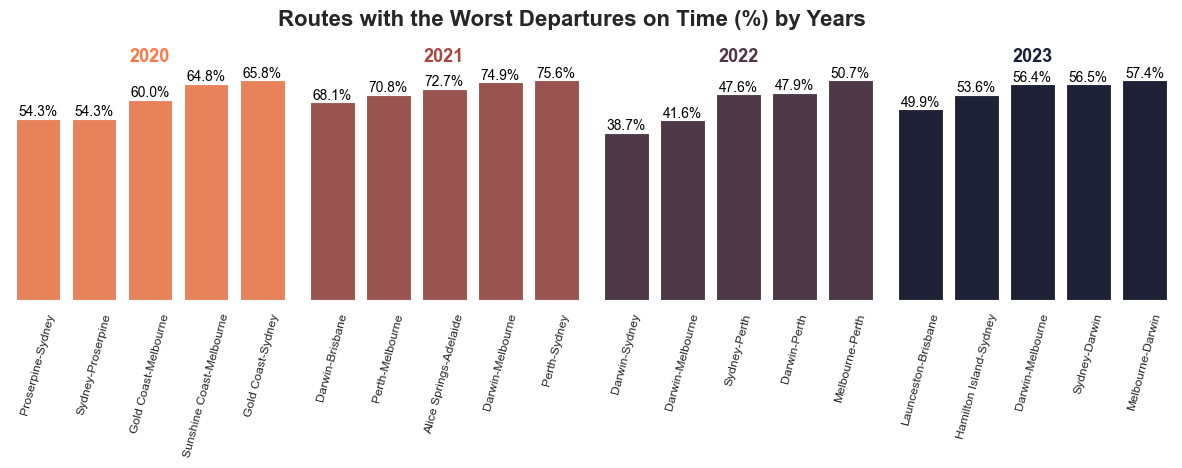

In [41]:
#Worst Departure Route 

sns.set_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

fig, axes = plt.subplots(1, 4, figsize=(15, 3))
plt.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('Routes with the Worst Departures on Time (%) by Years', fontsize=16, y=1.08,weight='bold')
        
bargraph(wordep2020,"Route","Aggregated Departures","#FF7844",0,"2020")
bargraph(wordep2021,"Route","Aggregated Departures","#A64942",1,"2021")
bargraph(wordep2022,"Route","Aggregated Departures","#53354A",2,"2022")
bargraph(wordep2023,"Route","Aggregated Departures","#1B1F3A",3,"2023")

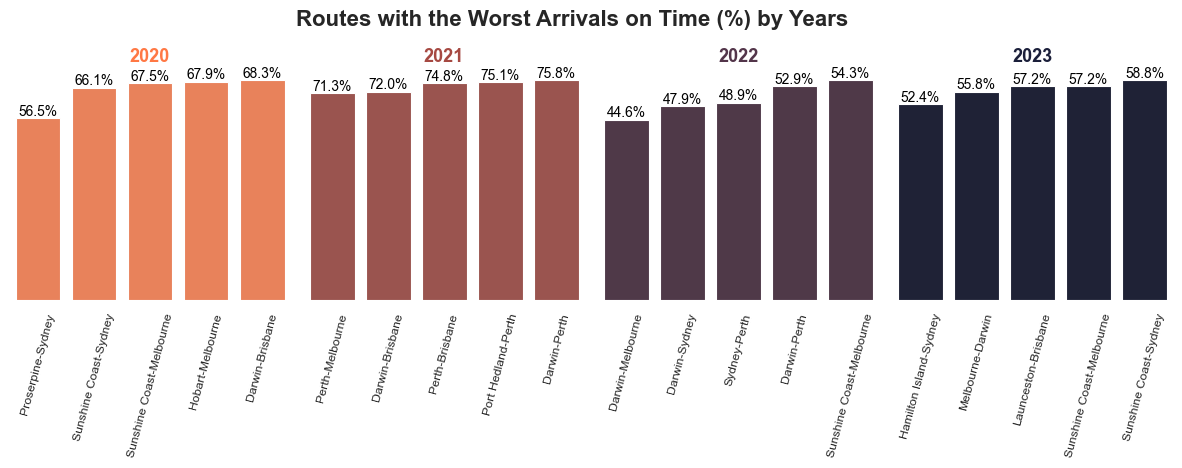

In [50]:
#Worst Arrival Route across the years

sns.set_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

fig, axes = plt.subplots(1, 4, figsize=(15, 3))
plt.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('Routes with the Worst Arrivals on Time (%) by Years', fontsize=16, y=1.08,weight='bold')

bargraph(worarr2020,"Route","Aggregated Arrivals","#FF7844",0,"2020")
bargraph(worarr2021,"Route","Aggregated Arrivals","#A64942",1,"2021")
bargraph(worarr2022,"Route","Aggregated Arrivals","#53354A",2,"2022")
bargraph(worarr2023,"Route","Aggregated Arrivals","#1B1F3A",3,"2023")

#### Aggregated Routes

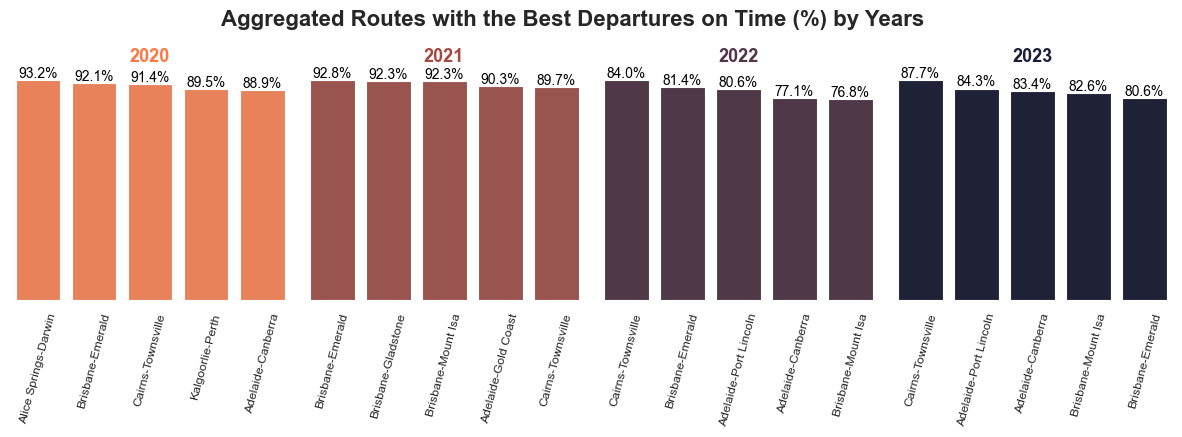

In [51]:
#Best Aggregated Dep

sns.set_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

fig, axes = plt.subplots(1, 4, figsize=(15, 3))
plt.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('Aggregated Routes with the Best Departures on Time (%) by Years', fontsize=16, y=1.08,weight='bold')
        
bargraph(bestdep2020_agg,"Route ID","Aggregated Departures","#FF7844",0,"2020")
bargraph(bestdep2021_agg,"Route ID","Aggregated Departures","#A64942",1,"2021")
bargraph(bestdep2022_agg,"Route ID","Aggregated Departures","#53354A",2,"2022")
bargraph(bestdep2023_agg,"Route ID","Aggregated Departures","#1B1F3A",3,"2023")

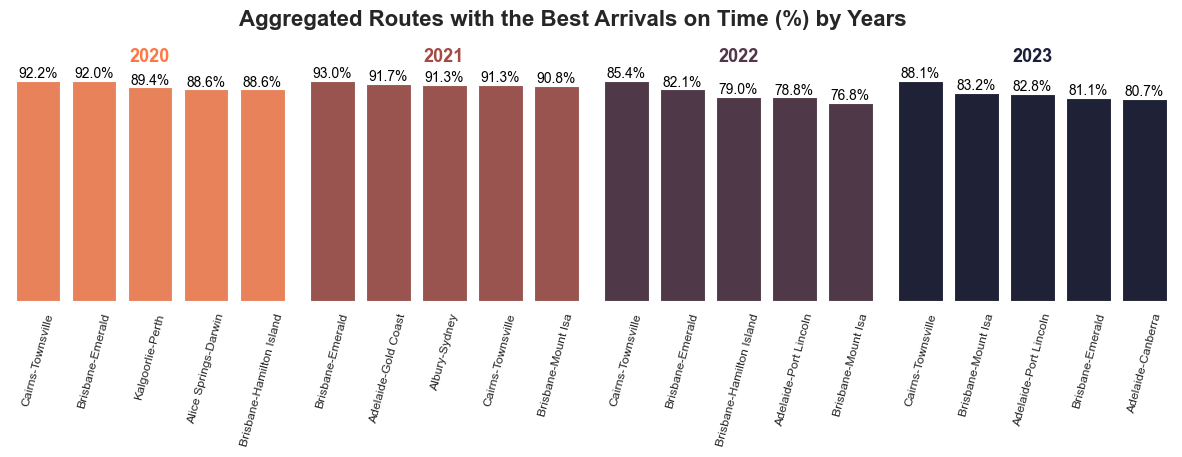

In [52]:
#Best Aggregated Arr

sns.set_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

fig, axes = plt.subplots(1, 4, figsize=(15, 3))
plt.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('Aggregated Routes with the Best Arrivals on Time (%) by Years', fontsize=16, y=1.08,weight='bold')
        
bargraph(bestarr2020_agg,"Route ID","Aggregated Arrivals","#FF7844",0,"2020")
bargraph(bestarr2021_agg,"Route ID","Aggregated Arrivals","#A64942",1,"2021")
bargraph(bestarr2022_agg,"Route ID","Aggregated Arrivals","#53354A",2,"2022")
bargraph(bestarr2023_agg,"Route ID","Aggregated Arrivals","#1B1F3A",3,"2023")

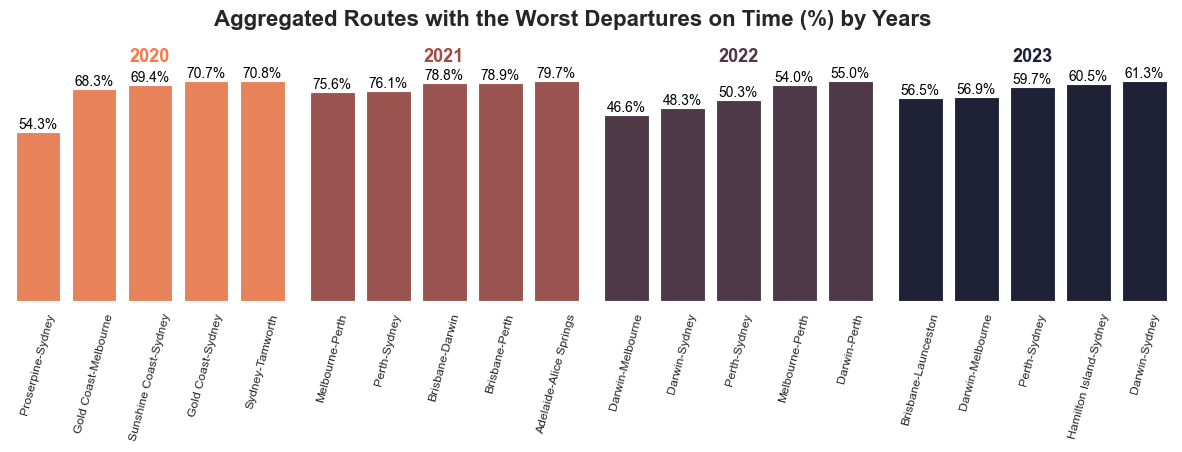

In [53]:
#Worst Aggregated Dep

sns.set_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

fig, axes = plt.subplots(1, 4, figsize=(15, 3))
plt.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('Aggregated Routes with the Worst Departures on Time (%) by Years', fontsize=16, y=1.08,weight='bold')
        
bargraph(wordep2020_agg,"Route ID","Aggregated Departures","#FF7844",0,"2020")
bargraph(wordep2021_agg,"Route ID","Aggregated Departures","#A64942",1,"2021")
bargraph(wordep2022_agg,"Route ID","Aggregated Departures","#53354A",2,"2022")
bargraph(wordep2023_agg,"Route ID","Aggregated Departures","#1B1F3A",3,"2023")

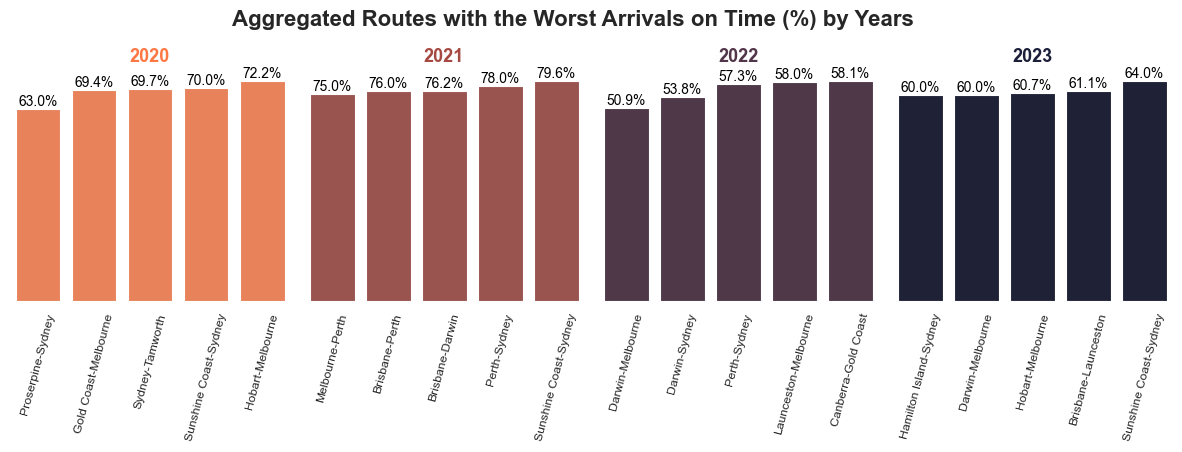

In [54]:
#Worst Aggregated Arrival

sns.set_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

fig, axes = plt.subplots(1, 4, figsize=(15, 3))
plt.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('Aggregated Routes with the Worst Arrivals on Time (%) by Years', fontsize=16, y=1.08,weight='bold')
        
bargraph(worarr2020_agg,"Route ID","Aggregated Arrivals","#FF7844",0,"2020")
bargraph(worarr2021_agg,"Route ID","Aggregated Arrivals","#A64942",1,"2021")
bargraph(worarr2022_agg,"Route ID","Aggregated Arrivals","#53354A",2,"2022")
bargraph(worarr2023_agg,"Route ID","Aggregated Arrivals","#1B1F3A",3,"2023")

#### Routes above 75th Quartile

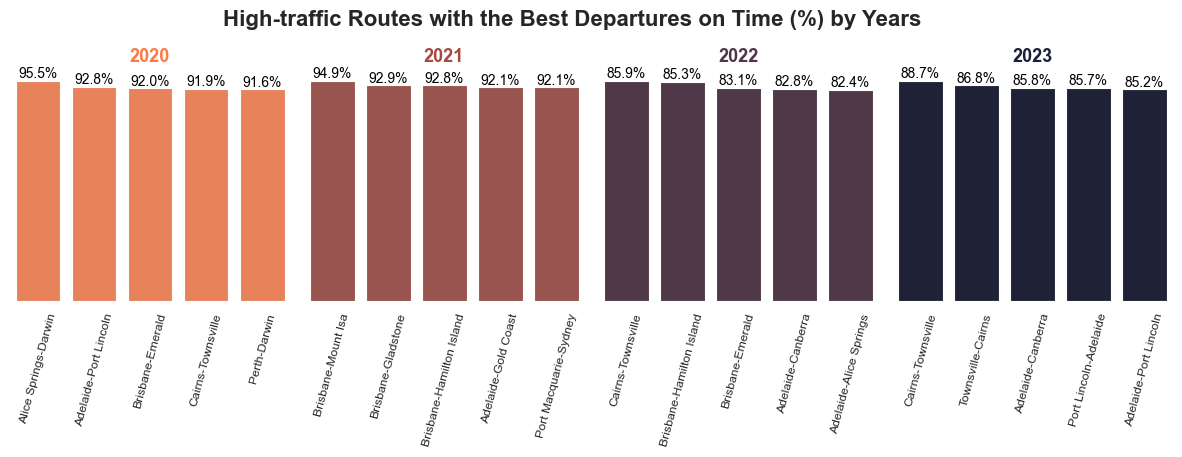

In [55]:
#Best Hightraffic Departure

sns.set_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

fig, axes = plt.subplots(1, 4, figsize=(15, 3))
plt.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('High-traffic Routes with the Best Departures on Time (%) by Years', fontsize=16, y=1.08,weight='bold')
        
bargraph(bestdep2020_quan,"Route","Aggregated Departures","#FF7844",0,"2020")
bargraph(bestdep2021_quan,"Route","Aggregated Departures","#A64942",1,"2021")
bargraph(bestdep2022_quan,"Route","Aggregated Departures","#53354A",2,"2022")
bargraph(bestdep2023_quan,"Route","Aggregated Departures","#1B1F3A",3,"2023")

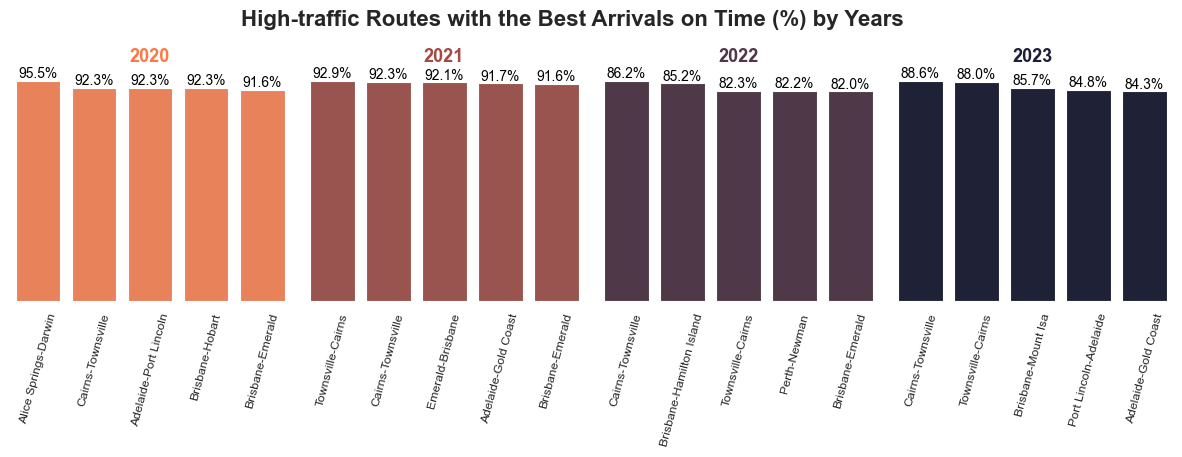

In [56]:
#Best Hightraffic Arrival

sns.set_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

fig, axes = plt.subplots(1, 4, figsize=(15, 3))
plt.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('High-traffic Routes with the Best Arrivals on Time (%) by Years', fontsize=16, y=1.08,weight='bold')
        
bargraph(bestarr2020_quan,"Route","Aggregated Arrivals","#FF7844",0,"2020")
bargraph(bestarr2021_quan,"Route","Aggregated Arrivals","#A64942",1,"2021")
bargraph(bestarr2022_quan,"Route","Aggregated Arrivals","#53354A",2,"2022")
bargraph(bestarr2023_quan,"Route","Aggregated Arrivals","#1B1F3A",3,"2023")

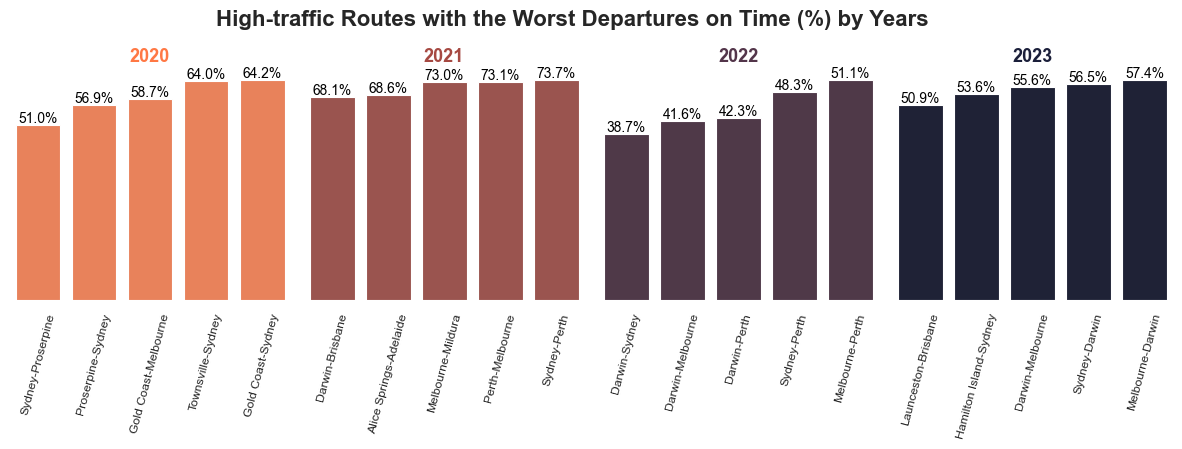

In [57]:
#Worst Hightraffic Departure 

sns.set_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

fig, axes = plt.subplots(1, 4, figsize=(15, 3))
plt.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('High-traffic Routes with the Worst Departures on Time (%) by Years', fontsize=16, y=1.08,weight='bold')
        
bargraph(wordep2020_quan,"Route","Aggregated Departures","#FF7844",0,"2020")
bargraph(wordep2021_quan,"Route","Aggregated Departures","#A64942",1,"2021")
bargraph(wordep2022_quan,"Route","Aggregated Departures","#53354A",2,"2022")
bargraph(wordep2023_quan,"Route","Aggregated Departures","#1B1F3A",3,"2023")

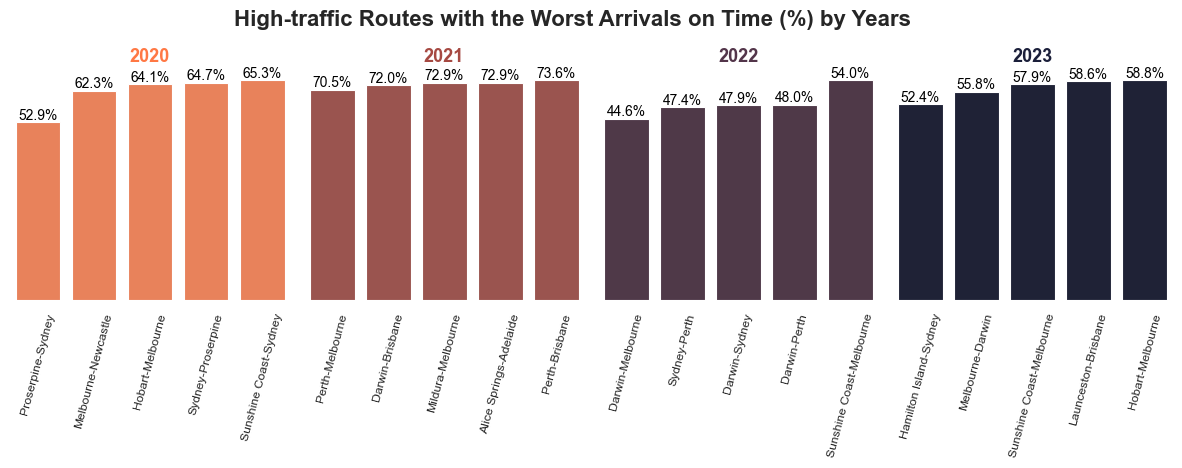

In [58]:
#Worst Hightraffic Arrival

sns.set_style("white")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

fig, axes = plt.subplots(1, 4, figsize=(15, 3))
plt.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('High-traffic Routes with the Worst Arrivals on Time (%) by Years', fontsize=16, y=1.08,weight='bold')
        
bargraph(worarr2020_quan,"Route","Aggregated Arrivals","#FF7844",0,"2020")
bargraph(worarr2021_quan,"Route","Aggregated Arrivals","#A64942",1,"2021")
bargraph(worarr2022_quan,"Route","Aggregated Arrivals","#53354A",2,"2022")
bargraph(worarr2023_quan,"Route","Aggregated Arrivals","#1B1F3A",3,"2023")

##### Scatterplot for Cancellations with Airlines

In [60]:
#Creating function for airlines

def cancellation_airline(year):
    """The function evaluates a dataframe to determine the cancecllation performance for airlines."""
    
    #The initial step is calculating the aggregated cancellations based on airlines.
    
    aggregate_list = {}

    for column in list(year.columns):
        if column in ["latitude_dep","longitude_dep","latitude_arr","longitude_arr"]:
            aggr_method = 'first'
        elif is_numeric_dtype(year[column]):
            aggr_method = 'sum'
        else:
            aggr_method = 'first'
        aggregate_list.update({column:aggr_method})
    
    base_airline = year.groupby('Airline').aggregate(aggregate_list)
    base_airline['Aggregated Cancellations Depart'] = base_airline["Cancellations"]/base_airline["Sectors Scheduled"]
    
    all_listairline = base_airline.sort_values(['Cancellations','Sectors Scheduled'], ascending = False)
    
    return all_listairline

In [61]:
#Applying to all years
airline_2020 = cancellation_airline(df2020)
airline_2020.drop(airline_2020.index[0], inplace=True)

airline_2021 = cancellation_airline(df2021)
airline_2021.drop(airline_2021.index[0], inplace=True)

airline_2022 = cancellation_airline(df2022)
airline_2022.drop(airline_2022.index[0], inplace=True)

airline_2023 = cancellation_airline(df2023)
airline_2023.drop(airline_2023.index[0], inplace=True)

airline_df = [airline_2020, airline_2021, airline_2022, airline_2023]
airline_facet = pd.concat(airline_df)

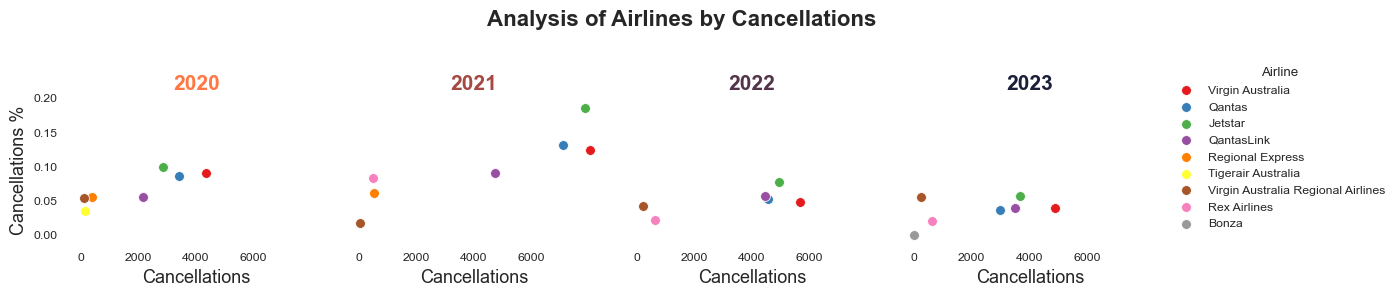

In [63]:
#Creating the scatterplot

cns = sns.FacetGrid(airline_facet, col="Year", hue="Airline",sharex=True, palette="Set1")
cns.fig.suptitle('Analysis of Airlines by Cancellations', fontsize=16, y=1,weight='bold')

cns.map(sns.scatterplot, "Cancellations", 'Aggregated Cancellations Depart', s=50 )
sns.despine(bottom = True, left = True)
cns.set_xlabels("Cancellations",fontsize=13);
cns.set_ylabels("Cancellations %",fontsize=13)
cns.add_legend()
cns.set(xticks=[0,2000,4000,6000],yticks=[0, 0.05,0.1,0.15,0.2])

axes = cns.axes.flatten()
axes[0].set_title("2020",color="#FF7844",fontsize=15,weight="bold")
axes[1].set_title("2021",color="#A64942",fontsize=15,weight="bold")
axes[2].set_title("2022",color="#53354A",fontsize=15,weight="bold")
axes[3].set_title("2023",color="#1B1F3A",fontsize=15,weight="bold")

cns.savefig('airlinecancel.png', bbox_inches = 'tight')

#### Map Visulisations

In [43]:
#In this part, we will be creating visulisations utilising the coordinates from geolocator
#We divide the geodataframe by the years and store them in new dataframes
df2020_geo = all_yearswithcoors_all[all_yearswithcoors_all["Year"] == 2020].reset_index(drop=True)
df2021_geo = all_yearswithcoors_all[all_yearswithcoors_all["Year"] == 2021].reset_index(drop=True)
df2022_geo = all_yearswithcoors_all[all_yearswithcoors_all["Year"] == 2022].reset_index(drop=True)
df2023_geo = all_yearswithcoors_all[all_yearswithcoors_all["Year"] == 2023].reset_index(drop=True)

In [45]:
#We create a copy of the cancellation code as we will be needing the full dataset instead of just a list

def cancellation_eval_geo(year):
    """The function evaluates a dataframe to determine the cancecllation performance for arrival and departure ports."""
    
    """The initial step is calculating the aggregated cancellations based on ports."""
    
    aggregate_list = {}

    for column in list(year.columns):
        if column in ["latitude_dep","longitude_dep","latitude_arr","longitude_arr"]:
            aggr_method = 'first'
        elif is_numeric_dtype(year[column]):
            aggr_method = 'sum'
        else:
            aggr_method = 'first'
        aggregate_list.update({column:aggr_method})
    
    base_depart = year.groupby('Departing Port').aggregate(aggregate_list)
    base_depart['Aggregated Cancellations Depart'] = base_depart["Cancellations"]/base_depart["Sectors Scheduled"]
    
    base_arrive = year.groupby('Arriving Port').aggregate(aggregate_list)
    base_arrive['Aggregated Cancellations Arrive'] = base_arrive["Cancellations"]/base_arrive["Sectors Scheduled"]
    
    #here we only need the base data that includes both the cancellation rates and sum of cancellations including their coordinates
    
    all_listdep_per = base_depart.sort_values(['Aggregated Cancellations Depart','Sectors Scheduled'], ascending = False)
    all_listarr_per = base_arrive.sort_values(['Aggregated Cancellations Arrive','Sectors Scheduled'], ascending = False)
    
    return all_listdep_per,all_listarr_per

In [46]:
#Applying the cacellation eval function with the geo dataframe

#For year 2020
alldep2020per_geo,allarr2020per_geo = cancellation_eval_geo(df2020_geo)

#For year 2021
alldep2021per_geo,allarr2021per_geo = cancellation_eval_geo(df2021_geo)

#For year 2022
alldep2022per_geo,allarr2022per_geo = cancellation_eval_geo(df2022_geo)

#For year 2023
alldep2023per_geo,allarr2023per_geo = cancellation_eval_geo(df2023_geo)

alldep2020per_geo = alldep2020per_geo.rename(columns={"Aggregated Cancellations Depart": 'Cancellation %'})
allarr2020per_geo = allarr2020per_geo.rename(columns={"Aggregated Cancellations Arrive": 'Cancellation %'})
alldep2021per_geo = alldep2021per_geo.rename(columns={"Aggregated Cancellations Depart": 'Cancellation %'})
allarr2021per_geo = allarr2021per_geo.rename(columns={"Aggregated Cancellations Arrive": 'Cancellation %'})
alldep2022per_geo = alldep2022per_geo.rename(columns={"Aggregated Cancellations Depart": 'Cancellation %'})
allarr2022per_geo = allarr2022per_geo.rename(columns={"Aggregated Cancellations Arrive": 'Cancellation %'})
alldep2023per_geo = alldep2023per_geo.rename(columns={"Aggregated Cancellations Depart": 'Cancellation %'})
allarr2023per_geo = allarr2023per_geo.rename(columns={"Aggregated Cancellations Arrive": 'Cancellation %'})


#### Departing Ports

In [47]:
#For 2020: Cancellations

cn_dep = px.density_mapbox(alldep2020per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellations", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation for Departing Ports in 2020",
    title_font_color="black",title_font_weight="bold")

cn_dep.show()

In [45]:
#For 2020: Cancellations %

cn_dep = px.density_mapbox(alldep2020per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellation %", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation % for Departing Ports in 2020",
    title_font_color="black",title_font_weight="bold")

cn_dep.show()

In [46]:
#For 2021: Cancellations

cn_dep = px.density_mapbox(alldep2021per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellations", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation for Departing Ports in 2021",
    title_font_color="black",title_font_weight="bold")
cn_dep.show()

In [47]:
#For 2021: Cancellations %

cn_dep = px.density_mapbox(alldep2021per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellation %", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation % for Departing Ports in 2021",
    title_font_color="black",title_font_weight="bold")
cn_dep.show()

In [48]:
#For 2022: Cancellations

cn_dep = px.density_mapbox(alldep2022per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellations", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation for Departing Ports in 2022",
    title_font_color="black",title_font_weight="bold")
cn_dep.show()

In [49]:
#For 2022: Cancellations %

cn_dep = px.density_mapbox(alldep2022per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellation %", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation % for Departing Ports in 2022",
    title_font_color="black",title_font_weight="bold")
cn_dep.show()

In [50]:
#For 2023: Cancellations

cn_dep = px.density_mapbox(alldep2023per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellations", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation for Departing Ports in 2023",
    title_font_color="black",title_font_weight="bold")
cn_dep.show()

In [51]:
#For 2023: Cancellations %

cn_dep = px.density_mapbox(alldep2023per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellation %", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation % for Departing Ports in 2023",
    title_font_color="black",title_font_weight="bold")
cn_dep.show()

#### Arriving Ports

In [52]:
#For 2020: Cancellations

cn_dep = px.density_mapbox(allarr2020per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellations", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation for Arriving Ports in 2020",
    title_font_color="black",title_font_weight="bold")

cn_dep.show()

In [58]:
#For 2020: Cancellations %

cn_dep = px.density_mapbox(allarr2020per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellation %", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation % for Arriving Ports in 2020",
    title_font_color="black",title_font_weight="bold")
cn_dep.show()

In [59]:
#For 2021: Cancellations

cn_dep = px.density_mapbox(allarr2021per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellations", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation for Arriving Ports in 2021",
    title_font_color="black",title_font_weight="bold")
cn_dep.show()

In [60]:
#For 2021: Cancellations %

cn_dep = px.density_mapbox(allarr2021per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellation %", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation % for Arriving Ports in 2021",
    title_font_color="black",title_font_weight="bold")
cn_dep.show()

In [61]:
#For 2022: Cancellations

cn_dep = px.density_mapbox(allarr2022per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellations", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation for Arriving Ports in 2022",
    title_font_color="black",title_font_weight="bold")
cn_dep.show()

In [62]:
#For 2022: Cancellations %

cn_dep = px.density_mapbox(allarr2022per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellation %", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation % for Arriving Ports in 2022",
    title_font_color="black",title_font_weight="bold")
cn_dep.show()

In [63]:
#For 2023: Cancellations

cn_dep = px.density_mapbox(allarr2023per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellations", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation for Arriving Ports in 2023",
    title_font_color="black",title_font_weight="bold")
cn_dep.show()

In [64]:
#For 2023: Cancellations %

cn_dep = px.density_mapbox(allarr2023per_geo, lat='latitude_dep', lon='longitude_dep', z="Cancellation %", radius=30,
                    center=dict(lat=-27.5, lon=133.7751), zoom=2.7,
                    mapbox_style="open-street-map", color_continuous_scale="sunsetdark")
cn_dep.update_layout(
    title_x=0.5,title_y=0.95,margin={"l": 0, "r": 0, "b": 0, "t": 60},
    title_text="Analysis of Cancellation % for Arriving Ports in 2023",
    title_font_color="black",title_font_weight="bold")
cn_dep.show()

### Historical Analysis

#### Utilising other years


In [43]:
#Here, we also analysed the other years by using the function from the first four questions
#Creating sheets for year periods. We grouped them by global events

df201012 = pd.concat([df2010, df2011,df2012], ignore_index=True) #post recovery from the global financial crises
df201316 = pd.concat([df2013, df2014,df2015,df2016], ignore_index=True) #years of stability but heightened security (MH incident)
df201719 = pd.concat([df2017, df2018,df2019], ignore_index=True) #geopolitical recession, and years before pandemic

In [44]:
#Question 1

#For year 2010
bestdep201012,wordep201012,bestarr201012,worarr201012,dep201012,arr201012 = year_eval(df201012)

#For year 2013
bestdep201316,wordep201316,bestarr201316,worarr201316,dep201316,arr201316 = year_eval(df201316)

#For year 2017
bestdep201719,wordep201719,bestarr201719,worarr201719,dep201719,arr201719 = year_eval(df201719)

In [46]:
#Question 2

route_aggr(df201012)
route_aggr(df201316)
route_aggr(df201719)

In [47]:
#For year 2010
bestdep201012_agg,wordep201012_agg,bestarr201012_agg,worarr201012_agg,dep201012_agg,arr201012_agg = year_eval_agg(df201012)

#For year 2013
bestdep201316_agg,wordep201316_agg,bestarr201316_agg,worarr201316_agg,dep201316_agg,arr201316_agg = year_eval_agg(df201316)

#For year 2017
bestdep201719_agg,wordep201719_agg,bestarr201719_agg,worarr201719_agg,dep201719_agg,arr201719_agg = year_eval_agg(df201719)

In [48]:
#Question 3
quantile_eval(df201012,.75)
quantile_eval(df201316,.75)
quantile_eval(df201719,.75)

In [49]:
#For year 2020
bestdep201012_quan,wordep201012_quan,bestarr201012_quan,worarr201012_quan,dep201012_quan,arr201012_quan = year_eval(df201012[df201012['Above Quantile']==True])

#For year 2013
bestdep201316_quan,wordep201316_quan,bestarr201316_quan,worarr201316_quan,dep201316_quan,arr201316_quan = year_eval(df201316[df201316['Above Quantile']==True])

#For year 2017
bestdep201719_quan,wordep201719_quan,bestarr201719_quan,worarr201719_quan,dep201719_quan,arr201719_quan = year_eval(df201719[df201719['Above Quantile']==True])

In [50]:
#Question 4

#For year 2010
candep201012per,canarr201012per,candep201012raw,canarr201012raw,alldep201012per,allarr201012per,alldep201012raw,allarr201012raw = cancellation_eval(df201012)

#For year 2013
candep201316per,canarr201316per,candep201316raw,canarr201316raw,alldep201316per,allarr201316per,alldep201316raw,allarr201316raw = cancellation_eval(df201316)

#For year 2017
candep201719per,canarr201719per,candep201719raw,canarr201719raw,alldep201719per,allarr201719per,alldep201719raw,allarr201719raw = cancellation_eval(df201719)

#### _END OF CODE_